# Linear Regression Example

Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/


In [10]:
%reset -sf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

print(f'TensorFlow version {tf.__version__}')
rng = np.random

TensorFlow version 2.11.0


## Parameters.

In [3]:
learning_rate = 0.01
training_steps = 1000
display_step = 50

## Training Data.

In [4]:
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

## Weight and Bias, initialized randomly.

In [5]:
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

2023-03-18 19:11:50.202393: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-18 19:11:50.244387: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
## Optimization process. 

In [7]:
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

## Run training for the given number of steps.

In [8]:
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.214430, W: 0.350299, b: 0.099315
step: 100, loss: 0.201360, W: 0.339009, b: 0.179362
step: 150, loss: 0.191110, W: 0.329010, b: 0.250248
step: 200, loss: 0.183072, W: 0.320155, b: 0.313022
step: 250, loss: 0.176768, W: 0.312314, b: 0.368613
step: 300, loss: 0.171824, W: 0.305370, b: 0.417842
step: 350, loss: 0.167948, W: 0.299221, b: 0.461437
step: 400, loss: 0.164907, W: 0.293775, b: 0.500044
step: 450, loss: 0.162523, W: 0.288953, b: 0.534232
step: 500, loss: 0.160653, W: 0.284683, b: 0.564509
step: 550, loss: 0.159187, W: 0.280901, b: 0.591320
step: 600, loss: 0.158037, W: 0.277552, b: 0.615064
step: 650, loss: 0.157135, W: 0.274586, b: 0.636090
step: 700, loss: 0.156428, W: 0.271959, b: 0.654710
step: 750, loss: 0.155873, W: 0.269634, b: 0.671199
step: 800, loss: 0.155438, W: 0.267574, b: 0.685801
step: 850, loss: 0.155097, W: 0.265750, b: 0.698733
step: 900, loss: 0.154830, W: 0.264135, b: 0.710184
step: 950, loss: 0.154620, W: 0.262704, b: 0.720325
step: 1000, l

## Graphic display

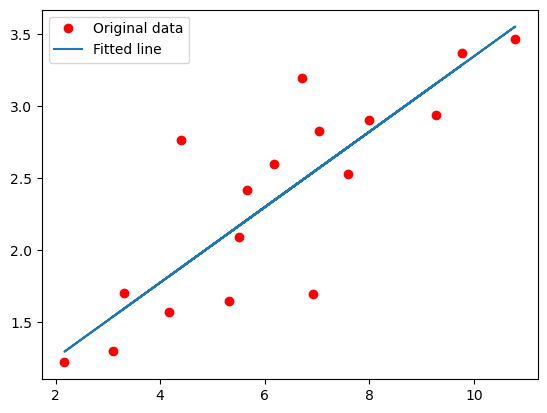

In [9]:
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()